<a href="https://colab.research.google.com/github/Hritikahere/Hotel_Booking_Data_Analysis/blob/main/Hedge_Fund_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Cleaning and Preparation**

**1.1 Importing Libraries**

In [104]:
import pandas as pd
import math
import numpy as np
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('fivethirtyeight')

**1.2 Loading the Data**

In [68]:
# Import the dataset
Data = pd.read_csv(r'all_stocks_5yr.csv')

**1.3 Data Preprocessing**

In [52]:
# Returns a specified number of rows from the top
Data.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [53]:
# Returns the number of rows and columns of the DataFrame.
Data.shape

(619040, 7)

In [54]:
# Generate descriptive statistics
Data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


**1.4 Handling Missing Values**

In [55]:
# Checking for missing values
missing_values = Data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [56]:
# Filling missing values using forward fill (ffill) [Carries the last known value forward to fill gaps, useful when data is expected to be continuous]
Data['open'].fillna(method='ffill', inplace=True)
Data['high'].fillna(method='ffill', inplace=True)
Data['low'].fillna(method='ffill', inplace=True)

<ipython-input-56-96e6ad520350>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['open'].fillna(method='ffill', inplace=True)
<ipython-input-56-96e6ad520350>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data['open'].fillna(method='ffill', inplace=True)
<ipython-input-56-96e6ad520350>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wil

In [57]:
# Missing values are filled now using Forward filling
Data.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


**1.5 Data Type Conversion**

In [58]:
# Converting date column to datetime format
Data['date'] = pd.to_datetime(Data['date'])

# Confirm data types
Data.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


**1.6 Outliers** **Handling**

In [59]:
# Capping outliers at the 1st and 99th percentiles for price and volume columns
for column in ['open', 'high', 'low', 'close', 'volume']:
    lower_cap = Data[column].quantile(0.01)
    upper_cap = Data[column].quantile(0.99)
    Data[column] = Data[column].clip(lower=lower_cap, upper=upper_cap)


In [60]:
print("Data types:\n", Data.dtypes)
print("Descriptive statistics after handling outliers:\n", Data[['open', 'high', 'low', 'close', 'volume']].describe())

Data types:
 date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
Name              object
dtype: object
Descriptive statistics after handling outliers:
                 open           high            low          close  \
count  619040.000000  619040.000000  619040.000000  619040.000000   
mean       79.630736      80.359640      78.873681      79.651669   
std        67.647027      68.264327      66.898593      67.658312   
min        11.990000      12.150000      11.820000      12.000000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max       471.738300     475.968300     465.413200     471.821000   

             volume  
count  6.190400e+05  
mean   4.031884e+06  
std    5.878903e+06  
min    2.448824e+05  
25%    1.070320e+

**1.7 Creating Derived Columns**

In [61]:
# Daily return calculation
Data['daily_return'] = Data.groupby('Name')['close'].pct_change() * 100  # Percentage change

# Rolling 30-day average return (to observe general trends over ~1 month)
Data['rolling_avg_return'] = Data.groupby('Name')['daily_return'].transform(lambda x: x.rolling(window=30).mean())

# 30-day rolling volatility (standard deviation of returns)
Data['rolling_volatility'] = Data.groupby('Name')['daily_return'].transform(lambda x: x.rolling(window=30).std())

# 2. Exploratory Data Analysis (EDA)

**2.1 Analyzing Best Performing Stocks**

In [63]:
# Calculating cumulative return from the beginning to the end of the dataset for each stock
cumulative_returns = Data.groupby('Name').apply(lambda x: (x['close'].iloc[-1] - x['close'].iloc[0]) / x['close'].iloc[0] * 100)
best_stock = cumulative_returns.idxmax()
best_stock_return = cumulative_returns.max()

print(f"Best-performing stock: {best_stock} with a cumulative return of {best_stock_return:.2f}%")

Best-performing stock: NVDA with a cumulative return of 1749.64%


<ipython-input-63-598fc316d4d8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cumulative_returns = Data.groupby('Name').apply(lambda x: (x['close'].iloc[-1] - x['close'].iloc[0]) / x['close'].iloc[0] * 100)


**2.1.1 Plotting Analysis**


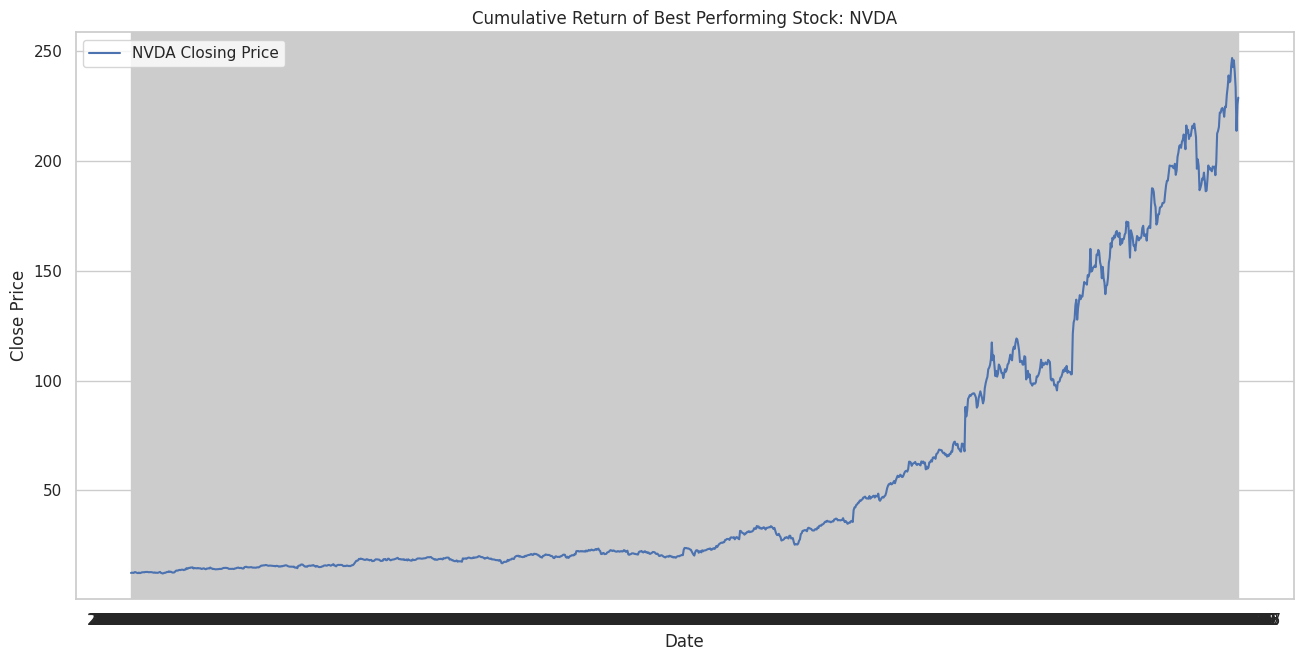

In [74]:
# Plotting cumulative return for the best-performing stock
best_stock_data = Data[Data['Name'] == best_stock]

plt.figure(figsize=(14, 7))
sns.lineplot(data=best_stock_data, x='date', y='close', label=f'{best_stock} Closing Price')
plt.title(f'Cumulative Return of Best Performing Stock: {best_stock}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**2.2 Univariate Analysis**
*  Descriptive Statistics
*  Histograms and Box Plots

In [66]:
# Descriptive statistics
Data.describe()

,date,open,high,low,close,volume,daily_return,rolling_avg_return,rolling_volatility
count,619040,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05,618535.000000,603890.000000,603890.000000
mean,2015-08-18 00:48:23.494443264,79.630736,80.359640,78.873681,79.651669,4.031884e+06,0.052433,0.055528,1.400293
min,2013-02-08 00:00:00,11.990000,12.150000,11.820000,12.000000,2.448824e+05,-62.618262,-3.012893,0.000000
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.245000,1.070320e+06,-0.656609,-0.087430,0.976087
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082094e+06,0.037404,0.059281,1.262243
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284509e+06,0.787867,0.207699,1.669075
max,2018-02-07 00:00:00,471.738300,475.968300,465.413200,471.821000,3.786276e+07,100.951315,3.761179,20.845189
std,NaN,67.647027,68.264327,66.898593,67.658312,5.878903e+06,1.566675,0.264436,0.698893


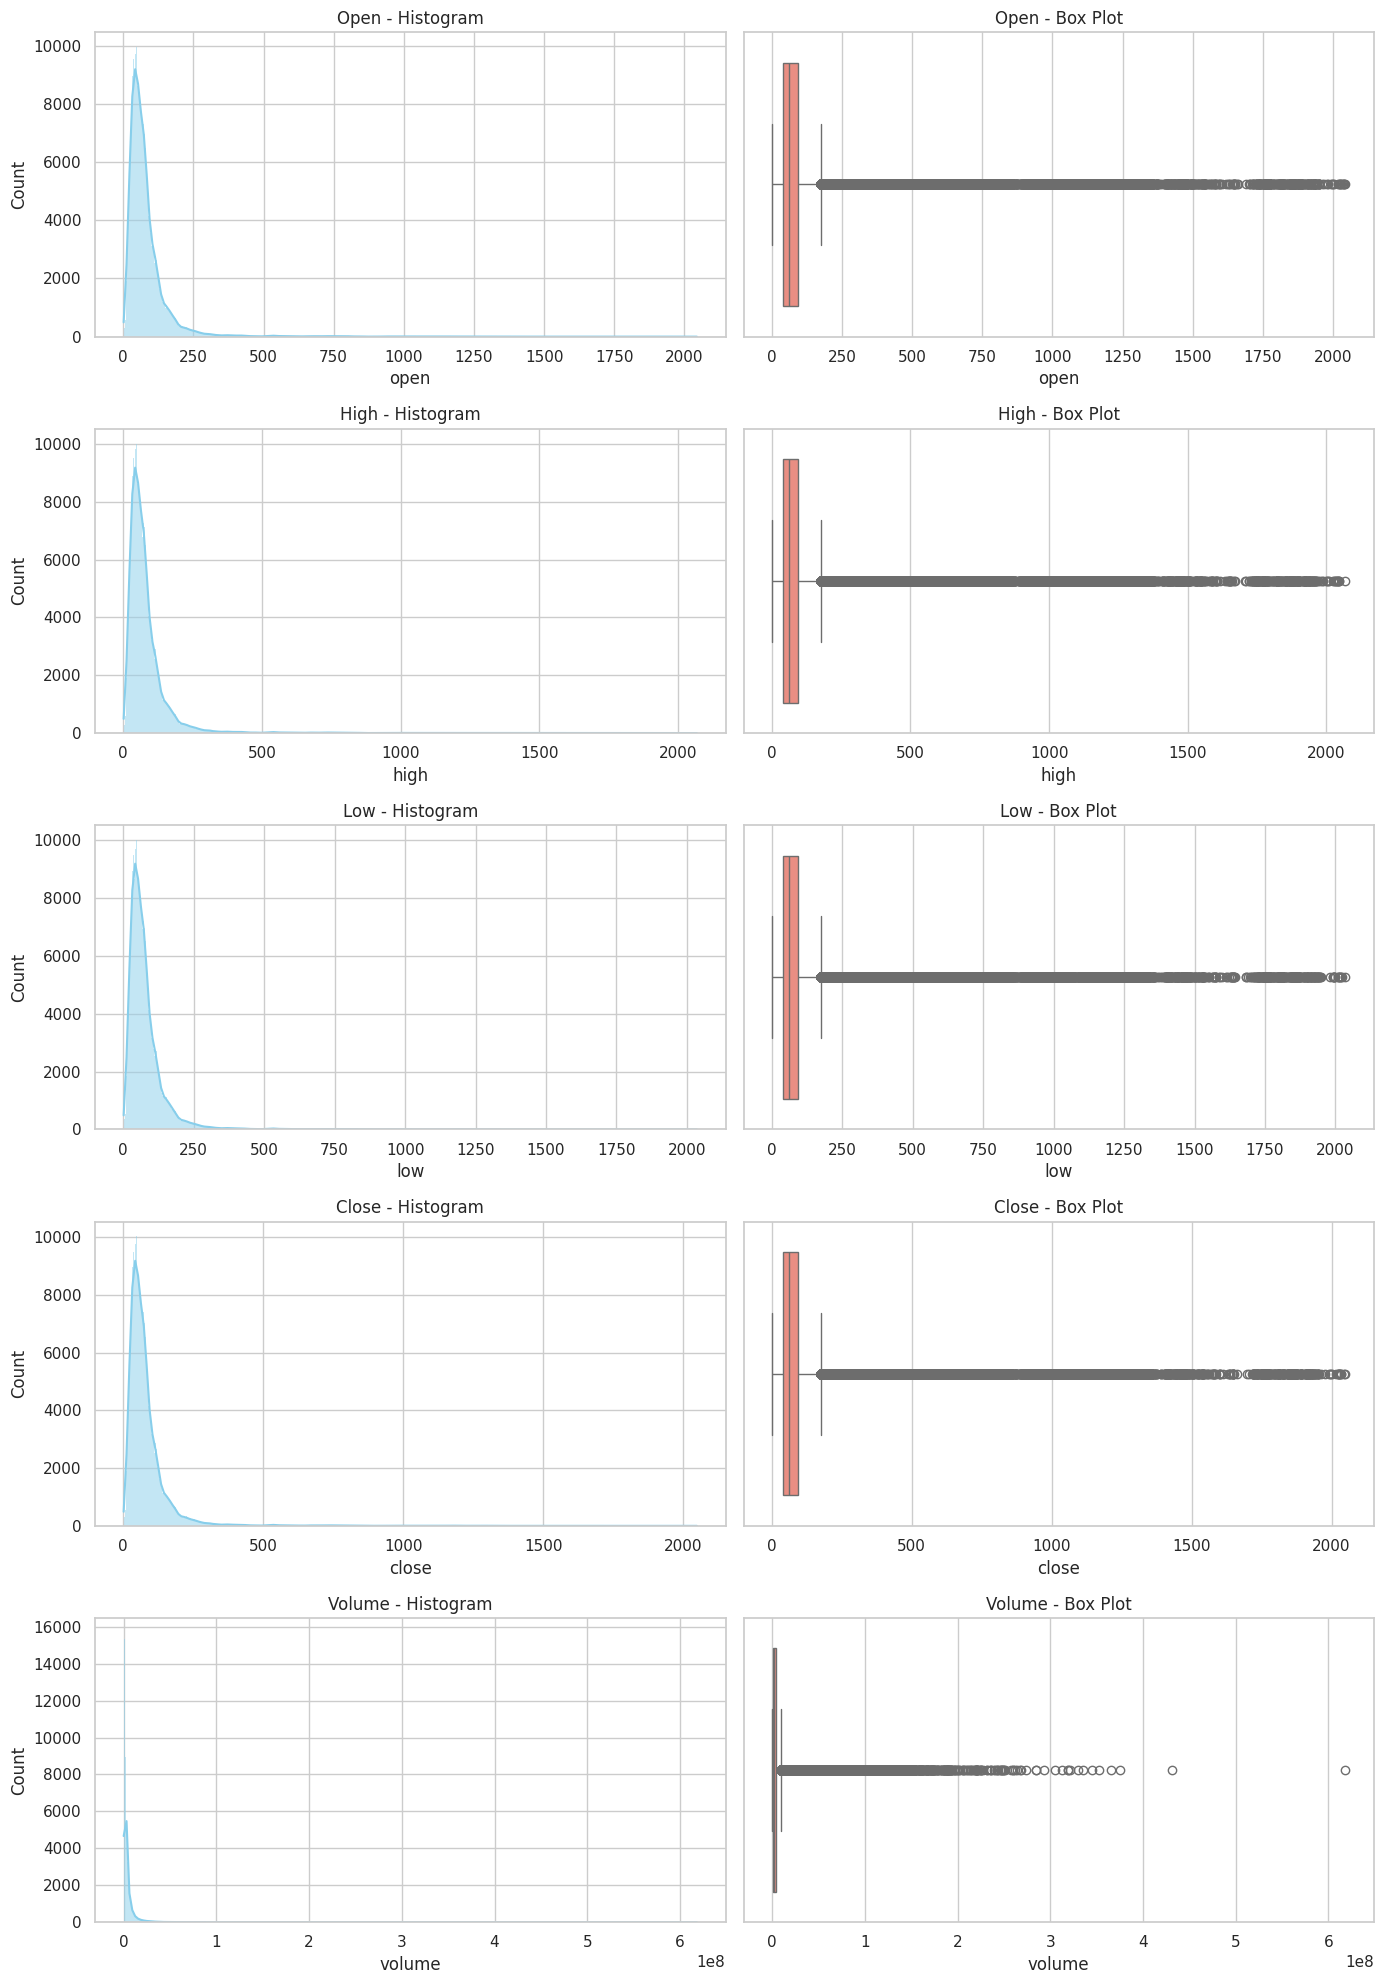

In [77]:
# Set style for the plots
sns.set(style="whitegrid")

# Plot histograms and box plots for each numerical column
fig, axes = plt.subplots(5, 2, figsize=(14, 20))
for i, column in enumerate(['open', 'high', 'low', 'close', 'volume']):
    # Histogram
    sns.histplot(Data[column], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{column.capitalize()} - Histogram')

    # Box plot
    sns.boxplot(x=Data[column], ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'{column.capitalize()} - Box Plot')

plt.tight_layout()
plt.show()

**2.3 Bivariate Analysis**
*  Scatter Plots and Correlation Matrix

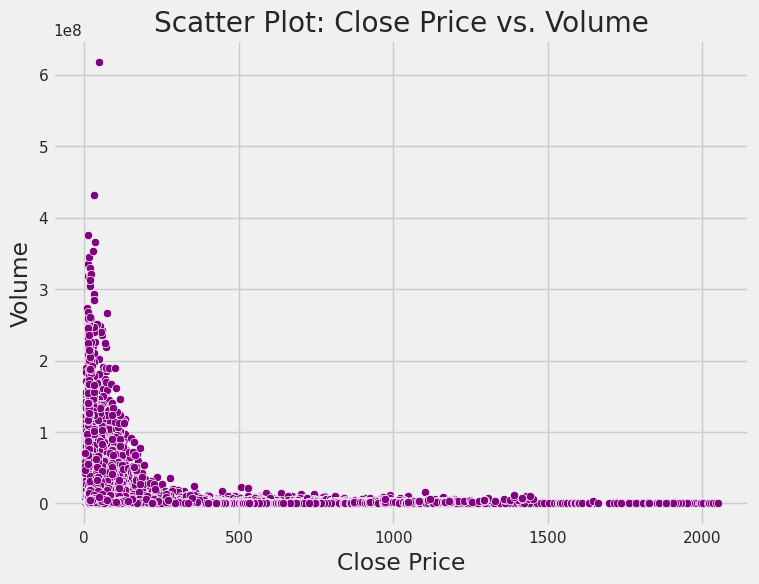

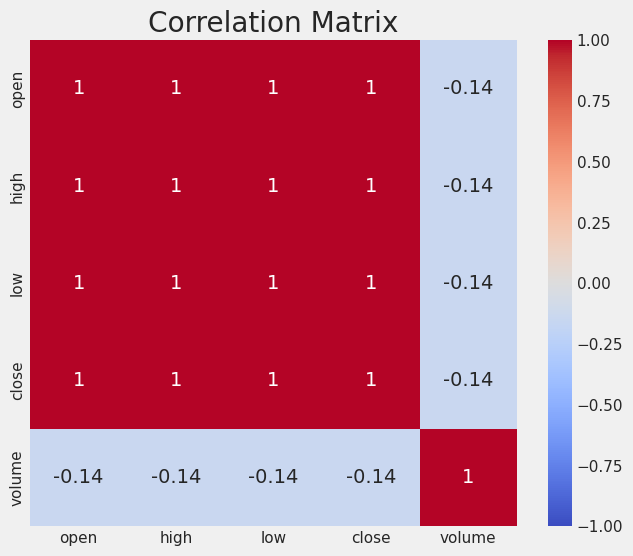

In [126]:
# Scatter plot between close price and volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Data['close'], y=Data['volume'], color='purple')
plt.title('Scatter Plot: Close Price vs. Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()

# Calculating and displaying correlation matrix
corr_matrix = Data[['open', 'high', 'low', 'close', 'volume']].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# 3. Time Series Analysis



*  Line Plots of Stock Prices and Returns
*  Moving Averages and Exponential Moving Averages
*  Seasonality and Trends




In [80]:
# Sorting data by date for time series analysis
Data.sort_values('date')

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.1200,14.630,14.75,8407500,AAL
508224,2013-02-08,81.22,81.9300,80.940,81.89,296853,SLG
506965,2013-02-08,78.24,79.0700,78.125,79.07,4632684,SLB
85755,2013-02-08,236.64,238.6924,235.750,238.16,552207,BLK
505706,2013-02-08,89.04,89.4800,88.910,89.16,554948,SJM
...,...,...,...,...,...,...,...
410042,2018-02-07,29.57,29.9300,28.460,28.53,3800172,NFX
570007,2018-02-07,54.50,55.6800,54.400,54.80,11005284,USB
147509,2018-02-07,53.38,54.3600,52.940,52.97,6496219,CSX
208239,2018-02-07,82.32,84.3800,81.590,81.62,3908996,ETN


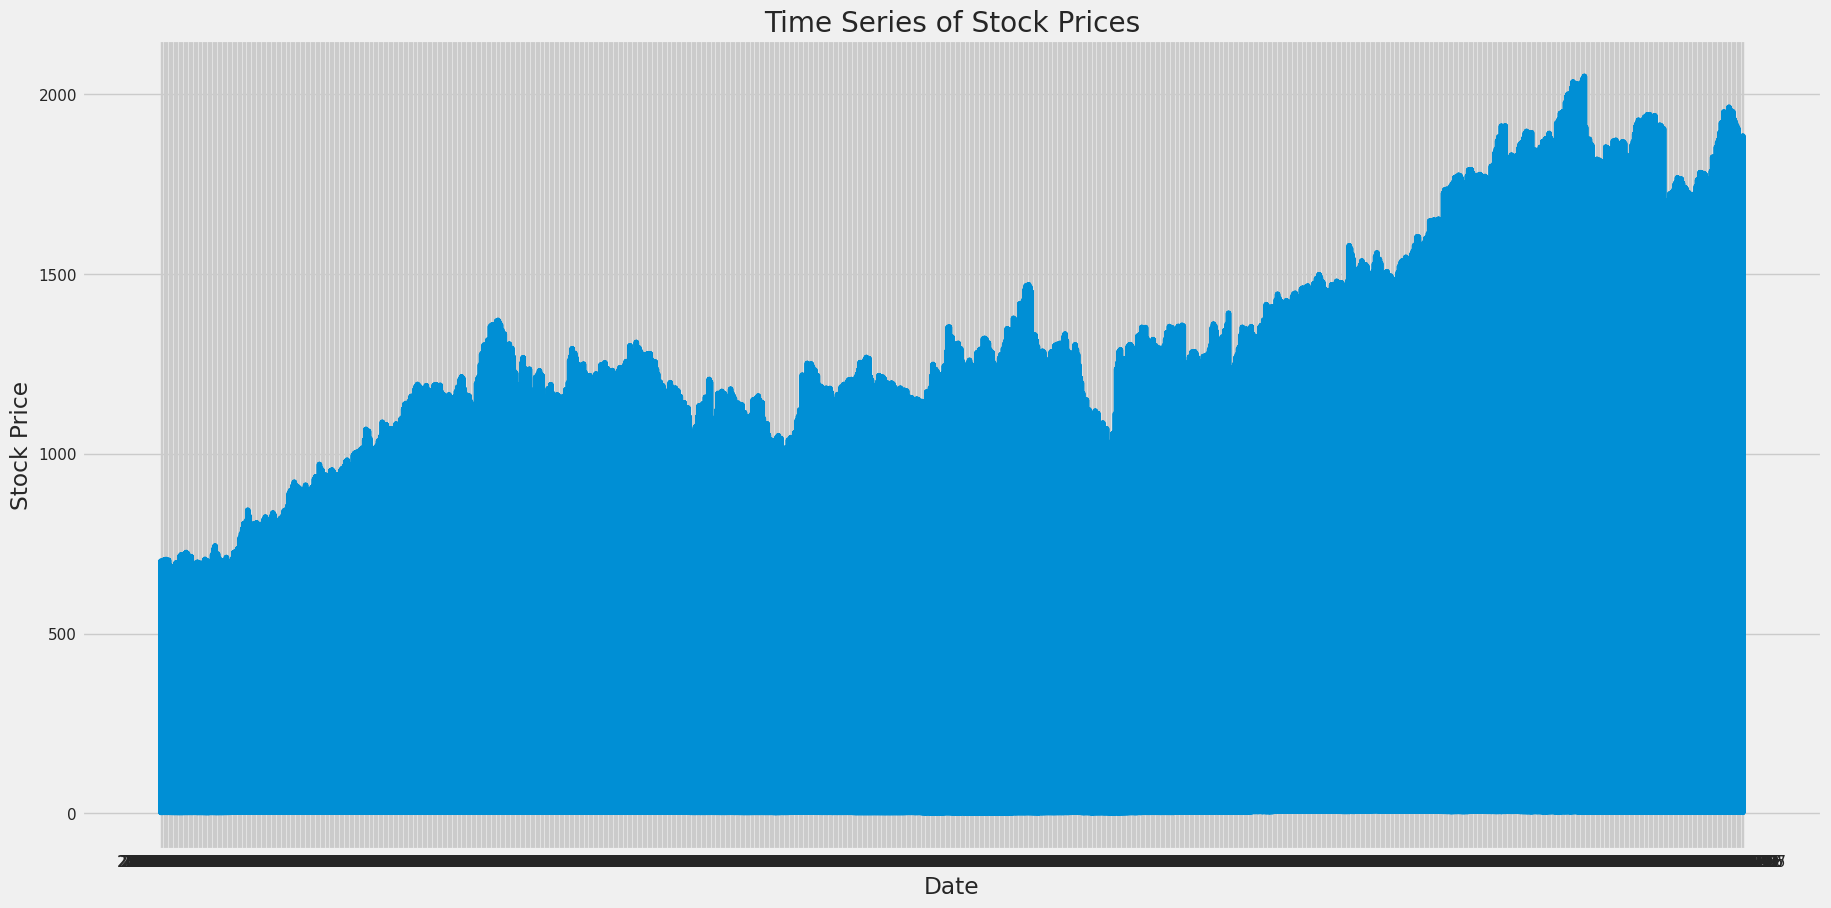

In [128]:
# Line plot for stock prices
plt.figure(figsize=(20,10))
plt.plot(Data['date'], Data['close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Time Series of Stock Prices')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


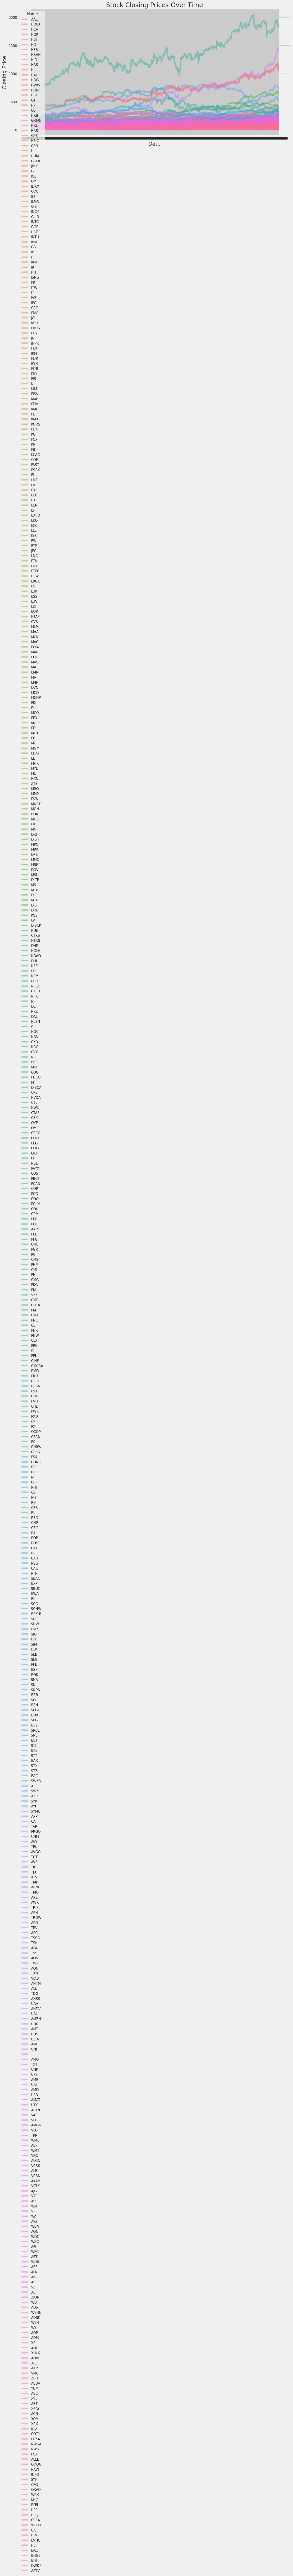

In [139]:
# Plotting time series for stock prices (e.g., closing price)
plt.figure(figsize=(14, 7))
sns.lineplot(Data, x='date', y='close', hue = 'Name', alpha=0.5)
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [129]:
# Calculating 30-day moving average and 60-day exponential moving average
Data['MA30'] = Data['close'].rolling(window=30).mean()
Data['EMA60'] = Data['close'].ewm(span=60, adjust=False).mean()

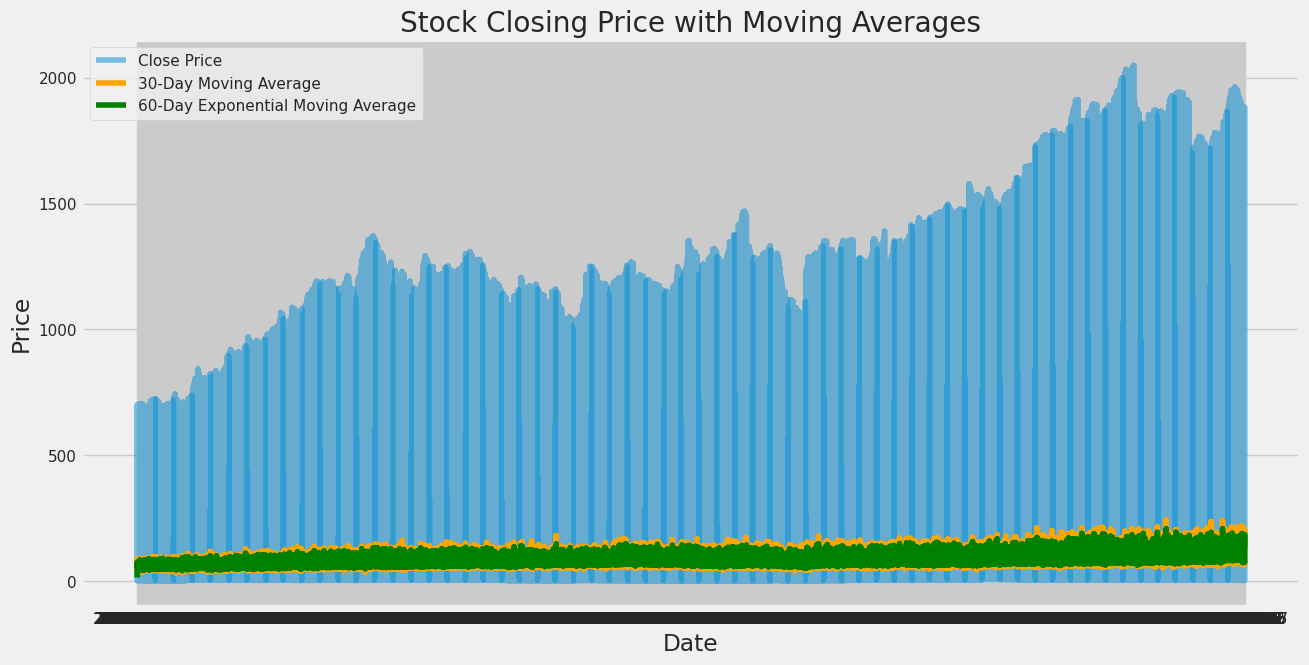

In [130]:
# Plotting the moving averages
plt.figure(figsize=(14, 7))
plt.plot(Data['date'], Data['close'], label='Close Price', alpha=0.5)
plt.plot(Data['date'], Data['MA30'], label='30-Day Moving Average', color='orange')
plt.plot(Data['date'], Data['EMA60'], label='60-Day Exponential Moving Average', color='green')
plt.title('Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [131]:
# Increase the chunk size for Agg rendering to accommodate the large dataset
mpl.rcParams['agg.path.chunksize'] = 10000

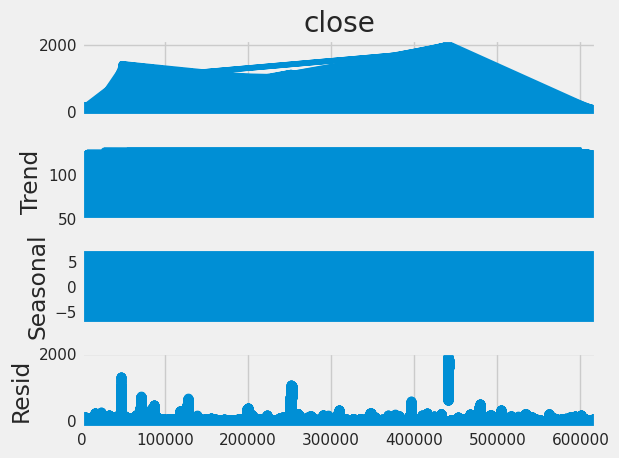

In [132]:
# Decompose time series to observe trend and seasonality
decomposition = seasonal_decompose(Data['close'], model='additive', period=365)
decomposition.plot()
plt.show()

In [133]:
# Save figures for presentation if needed
plt.savefig("time_series_analysis.png")

<Figure size 640x480 with 0 Axes>